# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import pint UnitRegistry
from pint import UnitRegistry

# Import API key
from config import api_key

#print(api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Input File (CSV)
input_data_file = "worldcities.csv"

# Output File (CSV)
output_data_file = "cityweather.csv"

# Pull the Lat and Long info for each city
worldcities_df = pd.read_csv(input_data_file, encoding="ISO-8859-1")
print(worldcities_df.describe())

# Identify the range of latitudes and longitudes
low_lat = worldcities_df['Latitude'].min()
high_lat = worldcities_df['Latitude'].max()
low_lng = worldcities_df['Longitude'].min()
high_lng = worldcities_df['Longitude'].max()


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

           Latitude     Longitude
count  46832.000000  46832.000000
mean      30.357469     15.124052
std       22.591569     70.354246
min      -54.800000   -179.500000
25%       14.588547    -42.104167
50%       38.764127     20.382638
75%       47.550000     61.079450
max       78.216667    179.316667


## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = [] 

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=low_lat, high=high_lat, size=1500) 
lngs = np.random.uniform(low=low_lng, high=high_lng, size=1500)
rnd_lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for rnd_lat_lng in rnd_lat_lngs:
    city = citipy.nearest_city(rnd_lat_lng[0], rnd_lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)
print(city_count)
print(cities)





755
['jamestown', 'pointe-noire', 'bluff', 'luderitz', 'lorengau', 'naze', 'arraial do cabo', 'meulaboh', 'muros', 'butaritari', 'ostrovnoy', 'upernavik', 'ponta do sol', 'sovetskaya', 'carnarvon', 'ribeira grande', 'roma', 'bethel', 'kapaa', 'bredasdorp', 'amapa', 'isangel', 'taoudenni', 'tidore', 'killybegs', 'tasiilaq', 'mehamn', 'kaniv', 'cajati', 'cabedelo', 'puerto ayora', 'reconquista', 'codrington', 'kudahuvadhoo', 'ishigaki', 'hambantota', 'faanui', 'avarua', 'thompson', 'umzimvubu', 'cherskiy', 'najran', 'alofi', 'yellowknife', 'samusu', 'furano', 'dejen', 'itaporanga', 'rikitea', 'dauphin', 'mahebourg', 'dingle', 'maarianhamina', 'namibe', 'punta arenas', 'riyadh', 'barentsburg', 'mys shmidta', 'bama', 'nguiu', 'edson', 'vanavara', 'darnah', 'tautira', 'atyrau', 'ancud', 'hilo', 'hohhot', 'egvekinot', 'constantine', 'cidreira', 'vaini', 'cape town', 'grand gaube', 'hovd', 'margate', 'dakar', 'saint-philippe', 'kailua', 'sungaipenuh', 'atuona', 'norman wells', 'dok kham tai',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
# Save config information
#query_url = "http://api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=903c73a3914234e45c82595f0137158c"
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London,uk"

# Build query URL
query_url1 = url + "q=" + city + "&APPID=" + api_key
#print(query_url1)

# Unit conversion
ureg = UnitRegistry()
Q_ = ureg.Quantity

print("Beginning Data Retrieval\n")     
print("-----------------------------\n")
all_city_weather_df = pd.DataFrame(index=np.arange(0, 0), columns=('City#', 'City', 'Lat', 'Lon', 'Temp', 'Humidity', 'Clouds', 'Wind') )
city_counter = 0
city_count = 500
for city in cities:
    # Get weather data
    query_url1 = url + "q=" + city + "&APPID=" + api_key
    weather_response = requests.get(query_url1)
    weather_json = weather_response.json()
    try:
        #{'cod': '404', 'message': 'city not found'}
        city_error_code = weather_json["cod"]
        city_error_message = weather_json["message"]
        #print(f"Error {city_error_code}: {city_error_message}")
        print("City not found. Skipping...")
    except:
        # Get the temperature from the response
        
        try:
            city_lat = weather_json["coord"]["lat"]
            city_lon = weather_json["coord"]["lon"]
            city_temp_kelvin = float(weather_json["main"]["temp"])
            city_humidity = round(float(weather_json["main"]["humidity"]),2)
            city_clouds = round(float(weather_json["clouds"]["all"]),2)
            city_wind = round(float(weather_json["wind"]["speed"]),2)
            temperature = Q_(city_temp_kelvin, ureg.kelvin)
            city_temp_F = str(temperature.to('degF'))
            city_temp = round(float(city_temp_F.split(" ")[0]),2)
            city_counter = city_counter + 1
            print(f"Processing Record {city_counter} of Set 1 | {city}.")
            print(f"Temperature for {city} is {city_temp} F at location {city_lat},{city_lon}")
            print(f"Humidity is {city_humidity}%, cloudiness is {city_clouds}, and wind speed is {city_wind} m/s")
            
            all_city_weather_df.loc[city_counter] = [city_counter, city, city_lat, city_lon, city_temp, city_humidity, city_clouds, city_wind]
            #print(all_city_weather_df)
            time.sleep(1)
            if city_counter == city_count:
                break
        except coord:
            print("No Coordinate or Temperature Data for {city}")



Beginning Data Retrieval

-----------------------------

Processing Record 1 of Set 1 | jamestown.
Temperature for jamestown is 77.01 F at location -33.21,138.6
Humidity is 70.0%, cloudiness is 0.0, and wind speed is 3.23 m/s
Processing Record 2 of Set 1 | pointe-noire.
Temperature for pointe-noire is 75.2 F at location -4.8,11.85
Humidity is 100.0%, cloudiness is 40.0, and wind speed is 2.1 m/s
Processing Record 3 of Set 1 | bluff.
Temperature for bluff is 82.1 F at location -23.58,149.07
Humidity is 42.0%, cloudiness is 0.0, and wind speed is 5.03 m/s
Processing Record 4 of Set 1 | luderitz.
Temperature for luderitz is 64.86 F at location -26.65,15.16
Humidity is 74.0%, cloudiness is 0.0, and wind speed is 8.08 m/s
Processing Record 5 of Set 1 | lorengau.
Temperature for lorengau is 80.34 F at location -2.02,147.27
Humidity is 100.0%, cloudiness is 64.0, and wind speed is 2.85 m/s
Processing Record 6 of Set 1 | naze.
Temperature for naze is 75.2 F at location 5.43,7.07
Humidity is 94

Processing Record 49 of Set 1 | dingle.
Temperature for dingle is 74.94 F at location 11,122.67
Humidity is 70.0%, cloudiness is 0.0, and wind speed is 5.6 m/s
City not found. Skipping...
Processing Record 50 of Set 1 | namibe.
Temperature for namibe is 76.52 F at location -15.19,12.15
Humidity is 100.0%, cloudiness is 56.0, and wind speed is 2.93 m/s
Processing Record 51 of Set 1 | punta arenas.
Temperature for punta arenas is 48.09 F at location -53.16,-70.91
Humidity is 61.0%, cloudiness is 0.0, and wind speed is 9.8 m/s
Processing Record 52 of Set 1 | riyadh.
Temperature for riyadh is 68.0 F at location 24.63,46.72
Humidity is 16.0%, cloudiness is 75.0, and wind speed is 4.6 m/s
City not found. Skipping...
City not found. Skipping...
Processing Record 53 of Set 1 | bama.
Temperature for bama is 60.95 F at location 24.14,107.25
Humidity is 94.0%, cloudiness is 92.0, and wind speed is 1.58 m/s
City not found. Skipping...
Processing Record 54 of Set 1 | edson.
Temperature for edson is

Processing Record 97 of Set 1 | batsfjord.
Temperature for batsfjord is 30.2 F at location 70.63,29.72
Humidity is 74.0%, cloudiness is 40.0, and wind speed is 5.1 m/s
Processing Record 98 of Set 1 | gizo.
Temperature for gizo is 53.42 F at location 31.8,34.94
Humidity is 72.0%, cloudiness is 75.0, and wind speed is 3.1 m/s
Processing Record 99 of Set 1 | ushuaia.
Temperature for ushuaia is 44.6 F at location -54.81,-68.31
Humidity is 70.0%, cloudiness is 40.0, and wind speed is 16.5 m/s
Processing Record 100 of Set 1 | beringovskiy.
Temperature for beringovskiy is 30.21 F at location 63.05,179.32
Humidity is 89.0%, cloudiness is 80.0, and wind speed is 12.1 m/s
Processing Record 101 of Set 1 | chifeng.
Temperature for chifeng is 24.41 F at location 42.27,118.96
Humidity is 69.0%, cloudiness is 0.0, and wind speed is 2.63 m/s
Processing Record 102 of Set 1 | guerrero negro.
Temperature for guerrero negro is 67.16 F at location 27.97,-114.04
Humidity is 51.0%, cloudiness is 8.0, and win

Processing Record 145 of Set 1 | lethem.
Temperature for lethem is 85.74 F at location 3.38,-59.8
Humidity is 48.0%, cloudiness is 0.0, and wind speed is 8.45 m/s
Processing Record 146 of Set 1 | dunedin.
Temperature for dunedin is 55.0 F at location -45.87,170.5
Humidity is 71.0%, cloudiness is 8.0, and wind speed is 4.02 m/s
Processing Record 147 of Set 1 | mayor pablo lagerenza.
Temperature for mayor pablo lagerenza is 69.81 F at location -19.93,-60.77
Humidity is 97.0%, cloudiness is 100.0, and wind speed is 5.83 m/s
Processing Record 148 of Set 1 | geraldton.
Temperature for geraldton is -0.4 F at location 49.72,-86.95
Humidity is 59.0%, cloudiness is 75.0, and wind speed is 2.6 m/s
Processing Record 149 of Set 1 | nalut.
Temperature for nalut is 43.89 F at location 31.86,10.98
Humidity is 96.0%, cloudiness is 92.0, and wind speed is 2.78 m/s
Processing Record 150 of Set 1 | iqaluit.
Temperature for iqaluit is -2.09 F at location 63.75,-68.52
Humidity is 77.0%, cloudiness is 90.0,

Processing Record 193 of Set 1 | bosaso.
Temperature for bosaso is 75.39 F at location 11.28,49.18
Humidity is 100.0%, cloudiness is 0.0, and wind speed is 1.88 m/s
Processing Record 194 of Set 1 | kota belud.
Temperature for kota belud is 78.1 F at location 6.35,116.43
Humidity is 74.0%, cloudiness is 75.0, and wind speed is 2.1 m/s
Processing Record 195 of Set 1 | norsup.
Temperature for norsup is 79.67 F at location -16.07,167.38
Humidity is 93.0%, cloudiness is 80.0, and wind speed is 8.2 m/s
Processing Record 196 of Set 1 | yeppoon.
Temperature for yeppoon is 82.4 F at location -23.13,150.74
Humidity is 51.0%, cloudiness is 20.0, and wind speed is 5.7 m/s
Processing Record 197 of Set 1 | saint-francois.
Temperature for saint-francois is 31.37 F at location 46.42,3.91
Humidity is 79.0%, cloudiness is 0.0, and wind speed is 1.15 m/s
Processing Record 198 of Set 1 | provideniya.
Temperature for provideniya is 32.0 F at location 64.42,-173.23
Humidity is 91.0%, cloudiness is 40.0, and

Processing Record 242 of Set 1 | rome.
Temperature for rome is 48.56 F at location 41.89,12.48
Humidity is 53.0%, cloudiness is 0.0, and wind speed is 3.1 m/s
Processing Record 243 of Set 1 | pacific grove.
Temperature for pacific grove is 55.94 F at location 36.62,-121.92
Humidity is 55.0%, cloudiness is 90.0, and wind speed is 1.5 m/s
Processing Record 244 of Set 1 | skeldon.
Temperature for skeldon is 77.51 F at location 5.88,-57.13
Humidity is 100.0%, cloudiness is 92.0, and wind speed is 6.18 m/s
Processing Record 245 of Set 1 | khorramshahr.
Temperature for khorramshahr is 62.6 F at location 30.43,48.18
Humidity is 72.0%, cloudiness is 90.0, and wind speed is 4.1 m/s
Processing Record 246 of Set 1 | fairbanks.
Temperature for fairbanks is 19.08 F at location 64.84,-147.72
Humidity is 72.0%, cloudiness is 1.0, and wind speed is 1.5 m/s
Processing Record 247 of Set 1 | quthing.
Temperature for quthing is 56.0 F at location -30.4,27.7
Humidity is 45.0%, cloudiness is 32.0, and wind 

Processing Record 291 of Set 1 | rydultowy.
Temperature for rydultowy is 34.36 F at location 50.06,18.42
Humidity is 86.0%, cloudiness is 40.0, and wind speed is 4.6 m/s
City not found. Skipping...
Processing Record 292 of Set 1 | kargasok.
Temperature for kargasok is 11.31 F at location 59.06,80.87
Humidity is 76.0%, cloudiness is 64.0, and wind speed is 1.83 m/s
Processing Record 293 of Set 1 | sioux lookout.
Temperature for sioux lookout is 1.4 F at location 50.1,-91.92
Humidity is 59.0%, cloudiness is 75.0, and wind speed is 2.6 m/s
Processing Record 294 of Set 1 | kilindoni.
Temperature for kilindoni is 83.94 F at location -7.91,39.67
Humidity is 100.0%, cloudiness is 80.0, and wind speed is 4.93 m/s
Processing Record 295 of Set 1 | tocopilla.
Temperature for tocopilla is 65.27 F at location -22.09,-70.2
Humidity is 87.0%, cloudiness is 0.0, and wind speed is 1.13 m/s
Processing Record 296 of Set 1 | balasing.
Temperature for balasing is 77.61 F at location 14.85,121.01
Humidity i

Processing Record 339 of Set 1 | olga.
Temperature for olga is 60.75 F at location 34.11,-118.17
Humidity is 67.0%, cloudiness is 1.0, and wind speed is 1.28 m/s
Processing Record 340 of Set 1 | funadhoo.
Temperature for funadhoo is 81.51 F at location 6.15,73.27
Humidity is 100.0%, cloudiness is 8.0, and wind speed is 3.35 m/s
Processing Record 341 of Set 1 | laguna.
Temperature for laguna is 78.8 F at location 27.52,-110.01
Humidity is 26.0%, cloudiness is 75.0, and wind speed is 3.6 m/s
Processing Record 342 of Set 1 | henties bay.
Temperature for henties bay is 66.99 F at location -22.12,14.28
Humidity is 87.0%, cloudiness is 0.0, and wind speed is 1.83 m/s
Processing Record 343 of Set 1 | san pedro.
Temperature for san pedro is 57.99 F at location -33.68,-59.66
Humidity is 62.0%, cloudiness is 0.0, and wind speed is 3.48 m/s
Processing Record 344 of Set 1 | airai.
Temperature for airai is 75.89 F at location -8.93,125.41
Humidity is 82.0%, cloudiness is 0.0, and wind speed is 0.83

Processing Record 386 of Set 1 | coruripe.
Temperature for coruripe is 82.41 F at location -10.12,-36.18
Humidity is 96.0%, cloudiness is 64.0, and wind speed is 6.6 m/s
Processing Record 387 of Set 1 | ketovo.
Temperature for ketovo is 3.08 F at location 55.35,65.33
Humidity is 82.0%, cloudiness is 44.0, and wind speed is 3.85 m/s
Processing Record 388 of Set 1 | churapcha.
Temperature for churapcha is -13.26 F at location 62,132.43
Humidity is 59.0%, cloudiness is 56.0, and wind speed is 1.2 m/s
Processing Record 389 of Set 1 | wewak.
Temperature for wewak is 83.13 F at location -3.55,143.63
Humidity is 76.0%, cloudiness is 8.0, and wind speed is 1.15 m/s
Processing Record 390 of Set 1 | chuy.
Temperature for chuy is 60.5 F at location -33.69,-53.46
Humidity is 80.0%, cloudiness is 0.0, and wind speed is 4.85 m/s
Processing Record 391 of Set 1 | san cristobal.
Temperature for san cristobal is 55.42 F at location -0.39,-78.55
Humidity is 87.0%, cloudiness is 75.0, and wind speed is 4.

City not found. Skipping...
Processing Record 435 of Set 1 | albany.
Temperature for albany is 15.31 F at location 42.65,-73.75
Humidity is 72.0%, cloudiness is 1.0, and wind speed is 1.5 m/s
Processing Record 436 of Set 1 | meshcherino.
Temperature for meshcherino is 30.13 F at location 55.2,38.36
Humidity is 80.0%, cloudiness is 75.0, and wind speed is 7.0 m/s
City not found. Skipping...
Processing Record 437 of Set 1 | murygino.
Temperature for murygino is 25.67 F at location 58.74,49.46
Humidity is 94.0%, cloudiness is 92.0, and wind speed is 5.5 m/s
Processing Record 438 of Set 1 | wattegama.
Temperature for wattegama is 69.05 F at location 7.35,80.68
Humidity is 94.0%, cloudiness is 64.0, and wind speed is 0.88 m/s
Processing Record 439 of Set 1 | bintulu.
Temperature for bintulu is 78.8 F at location 3.17,113.03
Humidity is 88.0%, cloudiness is 75.0, and wind speed is 1.5 m/s
Processing Record 440 of Set 1 | baherden.
Temperature for baherden is 34.22 F at location 38.44,57.43
H

Processing Record 484 of Set 1 | cayenne.
Temperature for cayenne is 78.8 F at location 4.94,-52.33
Humidity is 78.0%, cloudiness is 92.0, and wind speed is 2.6 m/s
Processing Record 485 of Set 1 | port augusta.
Temperature for port augusta is 85.37 F at location -32.49,137.76
Humidity is 65.0%, cloudiness is 0.0, and wind speed is 2.6 m/s
Processing Record 486 of Set 1 | mackenzie.
Temperature for mackenzie is 23.0 F at location 55.34,-123.09
Humidity is 45.0%, cloudiness is 1.0, and wind speed is 3.1 m/s
Processing Record 487 of Set 1 | bari sadri.
Temperature for bari sadri is 59.0 F at location 24.42,74.48
Humidity is 67.0%, cloudiness is 20.0, and wind speed is 1.0 m/s
Processing Record 488 of Set 1 | rehoboth.
Temperature for rehoboth is 60.5 F at location -23.31,17.08
Humidity is 39.0%, cloudiness is 0.0, and wind speed is 2.0 m/s
City not found. Skipping...
Processing Record 489 of Set 1 | corinth.
Temperature for corinth is 50.09 F at location 37.94,22.93
Humidity is 46.0%, cl

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
all_city_weather_df.to_csv(output_data_file)

In [37]:
print(all_city_weather_df.head())
print(all_city_weather_df.describe())

  City#          City    Lat     Lon   Temp  Humidity  Clouds  Wind
1     1     jamestown -33.21  138.60  77.01      70.0     0.0  3.23
2     2  pointe-noire  -4.80   11.85  75.20     100.0    40.0  2.10
3     3         bluff -23.58  149.07  82.10      42.0     0.0  5.03
4     4      luderitz -26.65   15.16  64.86      74.0     0.0  8.08
5     5      lorengau  -2.02  147.27  80.34     100.0    64.0  2.85
              Lat         Lon       Temp    Humidity      Clouds        Wind
count  500.000000  500.000000  500.00000  500.000000  500.000000  500.000000
mean    20.616140   19.007440   49.62668   74.214000   38.334000    3.664820
std     34.278426   89.388438   28.43035   20.046644   36.108532    2.676833
min    -54.810000 -179.170000  -42.51000    0.000000    0.000000    0.250000
25%     -7.685000  -59.690000   28.92500   64.000000    0.000000    1.580000
50%     25.585000   20.840000   55.88000   77.500000   36.000000    3.080000
75%     49.767500   93.227500   75.00500   90.250000 

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

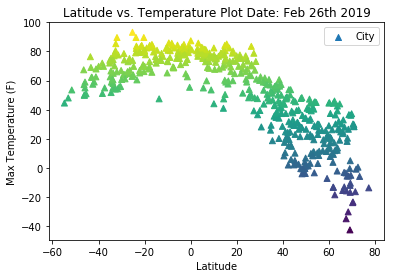

<Figure size 432x288 with 0 Axes>

In [49]:
Weather_Analysis_Date = "Date: Feb 26th 2019"

plt.title(f"Latitude vs. Temperature Plot {Weather_Analysis_Date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.scatter(all_city_weather_df["Lat"],all_city_weather_df["Temp"], c=all_city_weather_df["Temp"], marker='^',label="City")
plt.legend()

plt.show()
plt.savefig("Lat_v_Temp.png")

#### Latitude vs. Humidity Plot

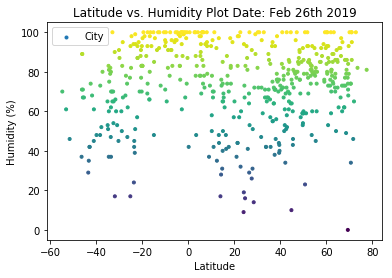

<Figure size 432x288 with 0 Axes>

In [60]:
plt.title(f"Latitude vs. Humidity Plot {Weather_Analysis_Date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(all_city_weather_df["Lat"],all_city_weather_df["Humidity"], c=all_city_weather_df["Humidity"], marker='.',label="City")
plt.legend()

plt.show()
plt.savefig("Lat_v_Humid.png")

#### Latitude vs. Cloudiness Plot

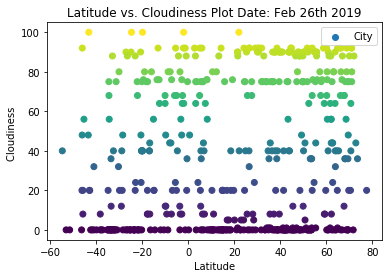

<Figure size 432x288 with 0 Axes>

In [59]:
plt.title(f"Latitude vs. Cloudiness Plot {Weather_Analysis_Date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness ")

plt.scatter(all_city_weather_df["Lat"],all_city_weather_df["Clouds"], c=all_city_weather_df["Clouds"], marker='o',label="City")
plt.legend()

plt.show()
plt.savefig("Lat_v_Clouds.png")

#### Latitude vs. Wind Speed Plot

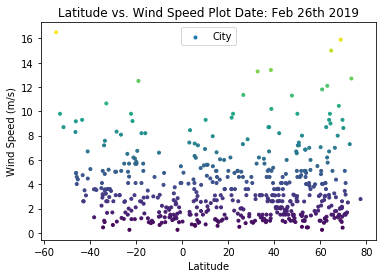

<Figure size 432x288 with 0 Axes>

In [54]:
plt.title(f"Latitude vs. Wind Speed Plot {Weather_Analysis_Date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

plt.scatter(all_city_weather_df["Lat"],all_city_weather_df["Wind"], c=all_city_weather_df["Wind"], marker='.',label="City")
plt.legend()

plt.show()
plt.savefig("Lat_v_Wind.png")

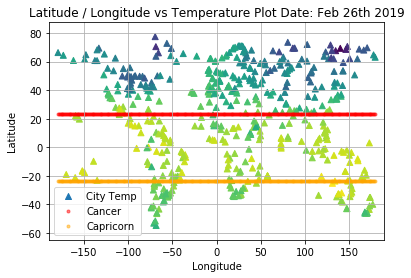

<Figure size 432x288 with 0 Axes>

In [141]:
plt.title(f"Latitude / Longitude vs Temperature Plot {Weather_Analysis_Date}")
plt.xlabel("Longitude")
plt.xlim([all_city_weather_df["Lon"].min() - 10, all_city_weather_df["Lon"].max() + 10])
plt.ylabel("Latitude")
plt.ylim([all_city_weather_df["Lat"].min() - 10, all_city_weather_df["Lat"].max() + 10])

plt.scatter(all_city_weather_df["Lon"],all_city_weather_df["Lat"], c=all_city_weather_df["Temp"], marker='^', label="City Temp")

tropic = list(np.arange(all_city_weather_df["Lon"].min(),0,1)) + list(np.arange(0,all_city_weather_df["Lon"].max(),1))
#print(tropic)
cancer = 23.5
plt.scatter(0,cancer, marker='.', facecolor="red", alpha=0.5, label="Cancer")
capricorn = -23.5
plt.scatter(0,capricorn, marker='.', facecolor="orange", alpha=0.5, label="Capricorn")
for tropic_plot in tropic:
    plt.scatter(tropic_plot,cancer, marker='.', facecolor="red", alpha=0.5)
    plt.scatter(tropic_plot,capricorn, marker='.', facecolor="orange", alpha=0.5)

plt.legend()
plt.grid()
plt.show()
plt.savefig("Lat_v_Lon_v_Temp.png")

In [ ]:
#OBSERVATIONS
#Higher temperatures between the tropical latitudes
#Lower temperatures in the higher latitudes - there happen to be more cities in the most northern latitudes compared with the southern latitudes
#High humidity between the tropical latitudes - less air movement and more evaporation contributes to increased humidity
#Wind speeds are currently below 10 m/s between the tropical latitudes - winds also create wind chill in colder regions
#More extreme winds in the extreme latitudes - high winds create wind chill in colder regions, and also move cold air to other latitudes
#Clouds typically form over large water bodies and are subject to wind movements



